In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys

sys.path.append('../')

In [9]:
from dataset_parser import (
    get_ordered_syllable_for_song,
    get_recording_time_from_filename,
    load_single_bird_syllable_csv,
    split_dataset_by_surgery_date
)

import pprint
file_path = '../Modeling_phys_canary/USA5288_decoded.csv'

results = load_single_bird_syllable_csv(file_path)

print(f'SONGS IN DATASET: {len(results)}')
pprint.pprint(results[1])

import json
from datetime import datetime
json_file_path = '../Modeling_phys_canary/USA5288_creation_data.json'

with open(json_file_path, 'r') as f:
    data = json.load(f)

    surgery_treatment_date = datetime.strptime(
        data['treatment_date'], '%Y-%m-%d')

print(f'Surgery Treatment Date: {surgery_treatment_date}')

results_pre_surgery, results_post_surgery = split_dataset_by_surgery_date(results, surgery_treatment_date)
print(f'PRE SURG SAMPLES: {len(results_pre_surgery)}, POST SURG SAMPLES: {len(results_post_surgery)}')

SONGS IN DATASET: 52151
{'animal_id': 'USA5288',
 'file_name': 'USA5288_45355.32438532_3_4_9_0_38.wav',
 'ordered_and_timed_syllables': [('8', 0.0, 1813.3333333333335),
                                 ('21', 1813.3333333333335, 3348.730158730159),
                                 ('22', 3348.730158730159, 4425.396825396826),
                                 ('21', 4425.396825396826, 4611.587301587302),
                                 ('22', 4611.587301587302, 4619.68253968254),
                                 ('21', 4619.68253968254, 4622.380952380952),
                                 ('22', 4622.380952380952, 4625.079365079366),
                                 ('21', 4625.079365079366, 4630.476190476191),
                                 ('26', 4630.476190476191, 4751.904761904762),
                                 ('23', 4751.904761904762, 5010.952380952382),
                                 ('2', 5010.952380952382, 5785.396825396826),
                                 ('3', 5785

In [13]:
def build_song_sequences(dataset):
    song_sequences = []
    for result in dataset:
        if len(result['ordered_and_timed_syllables']) == 0:
            continue

        song_sequences.append([
            str(s[0]) for s in result['ordered_and_timed_syllables']
        ])

    return song_sequences

pre_surgery_sequences = build_song_sequences(results_pre_surgery)
post_surgery_sequences = build_song_sequences(results_post_surgery)

In [129]:
from pypst import PST

def train_pst(sequence_dataset, alphabet=None):

    pst = PST(
        L = 5,
        p_min = 0.0073,
        g_min = .01,
        r = 1.6,
        alpha = 17.5,
        alphabet = alphabet
    )
    pst.fit(sequence_dataset)

    return pst

pre_surgery_pst = train_pst(pre_surgery_sequences)
alphabet = pre_surgery_pst.alphabet
post_surgery_pst = train_pst(post_surgery_sequences, alphabet=alphabet)

In [130]:
s = pre_surgery_pst.tree[1]['string']
pre_surgery_pst.tree[1]['parent']
print(pre_surgery_pst.tree[1].keys())
pre_surgery_pst.tree[1]['label']
len(pre_surgery_pst.tree[1]['p']), pre_surgery_pst.tree[2]['p'][1].shape


dict_keys(['string', 'parent', 'label', 'internal', 'g_sigma_s', 'p', 'f'])


(28, (30,))

In [131]:
order = 2
idx = 3

print(len(pre_surgery_pst.tree[order]['p'][idx]), len(post_surgery_pst.tree[order]['p'][idx]))

trans = pre_surgery_pst.tree[order]['p'][idx]
trans

30 30


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.11940895e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.59915565e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.59915565e-05,
       0.00000000e+00, 0.00000000e+00, 1.18657349e-02, 3.03839573e-04,
       0.00000000e+00, 0.00000000e+00, 4.79746694e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

30 30


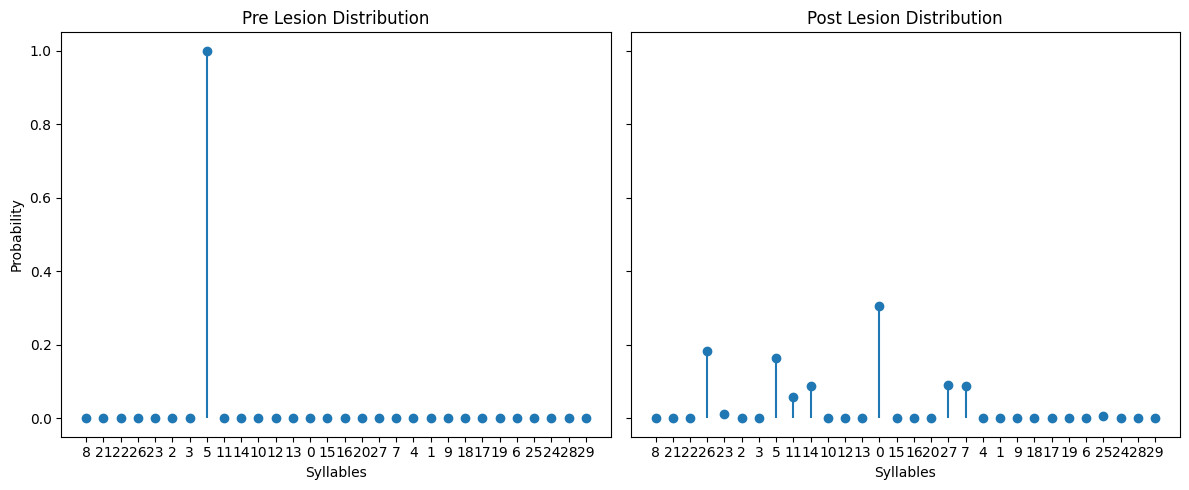

{"Earth Mover's Distance": np.float64(4.863994130832346),
 'Information Gain': np.float64(-1.8714837922808707),
 'Kullback-Leibler Divergence': np.float64(1.7991362543211438)}
30 30


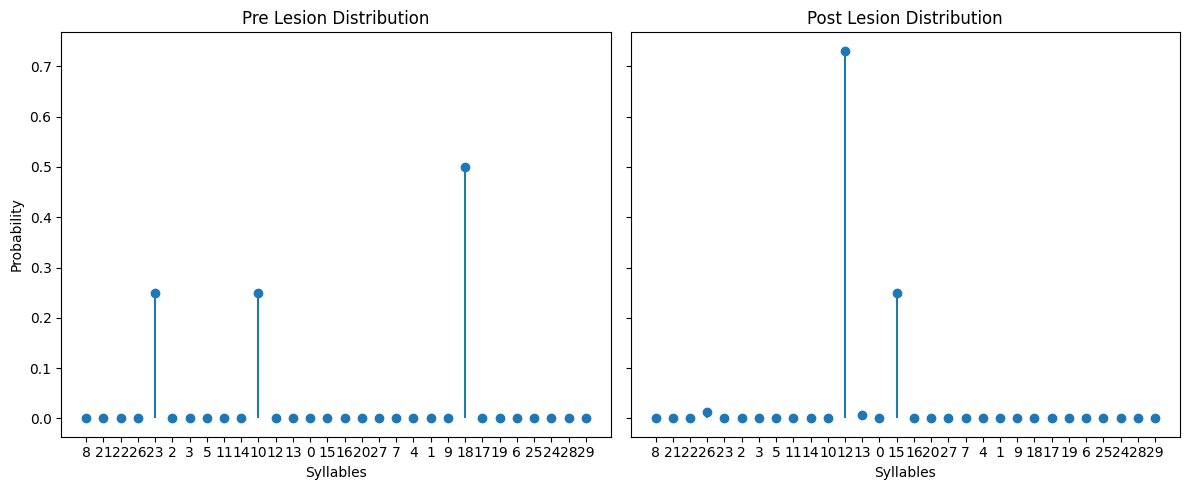

{"Earth Mover's Distance": np.float64(6.6687511483978525),
 'Information Gain': np.float64(0.3777775749559087),
 'Kullback-Leibler Divergence': np.float64(21.462096612663625)}
30 30


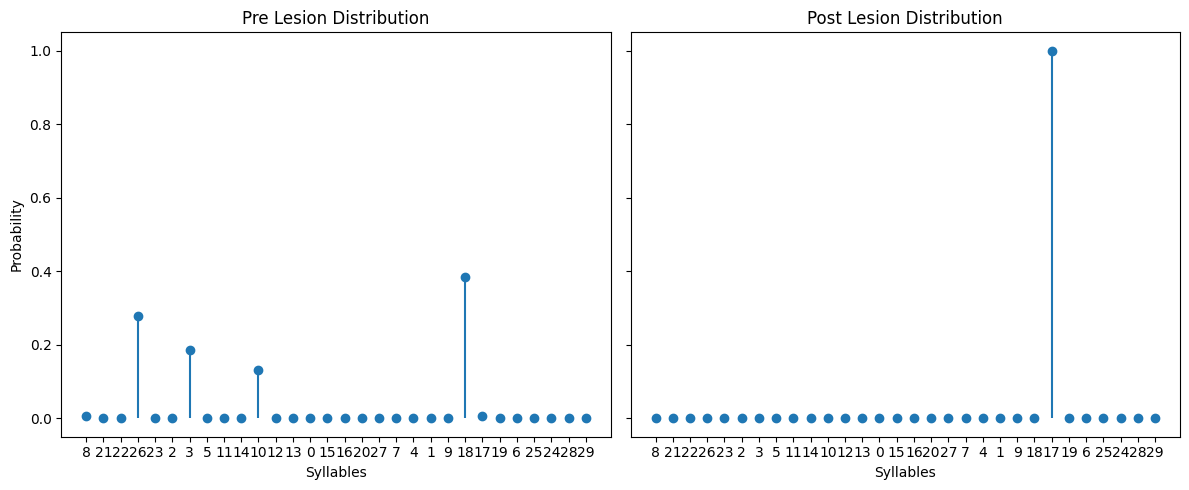

{"Earth Mover's Distance": np.float64(11.034528042645018),
 'Information Gain': np.float64(1.4003070000228077),
 'Kullback-Leibler Divergence': np.float64(15.905981062403788)}
30 30


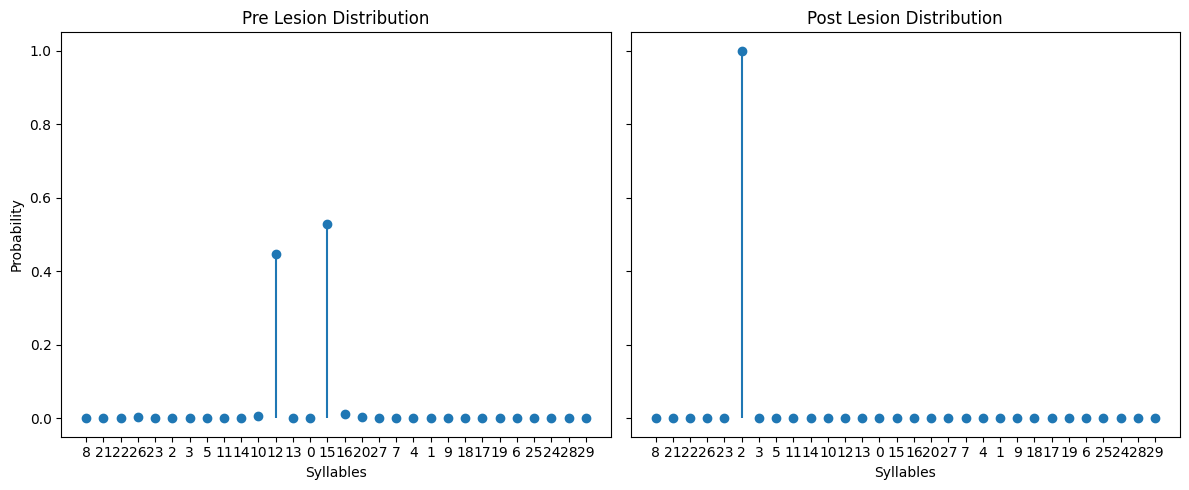

{"Earth Mover's Distance": np.float64(7.6328441272079095),
 'Information Gain': np.float64(0.8325602302410728),
 'Kullback-Leibler Divergence': np.float64(16.59407763536336)}
30 30


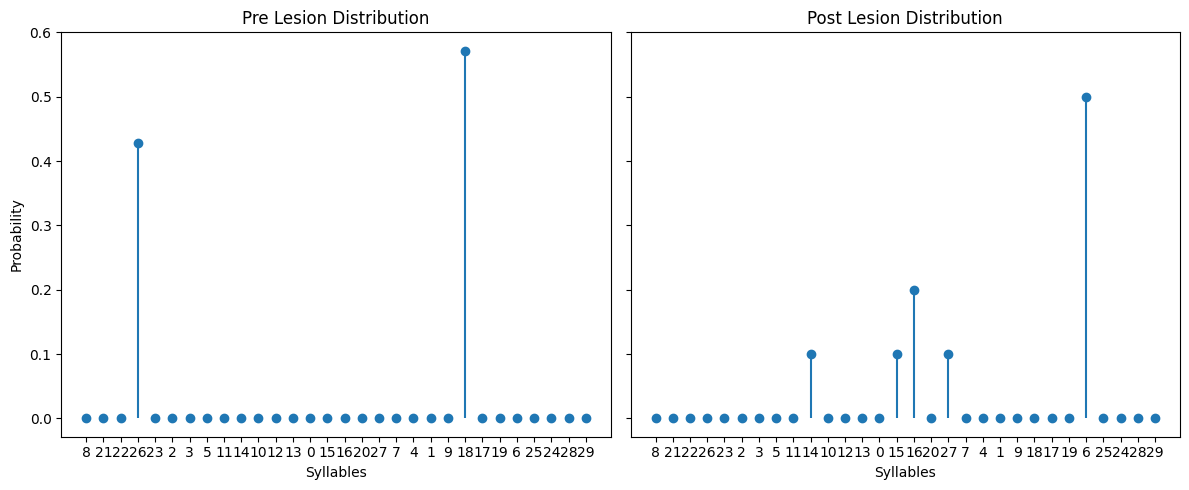

{"Earth Mover's Distance": np.float64(6.357144261843498),
 'Information Gain': np.float64(-0.676325661969651),
 'Kullback-Leibler Divergence': np.float64(19.046323600081195)}
30 30


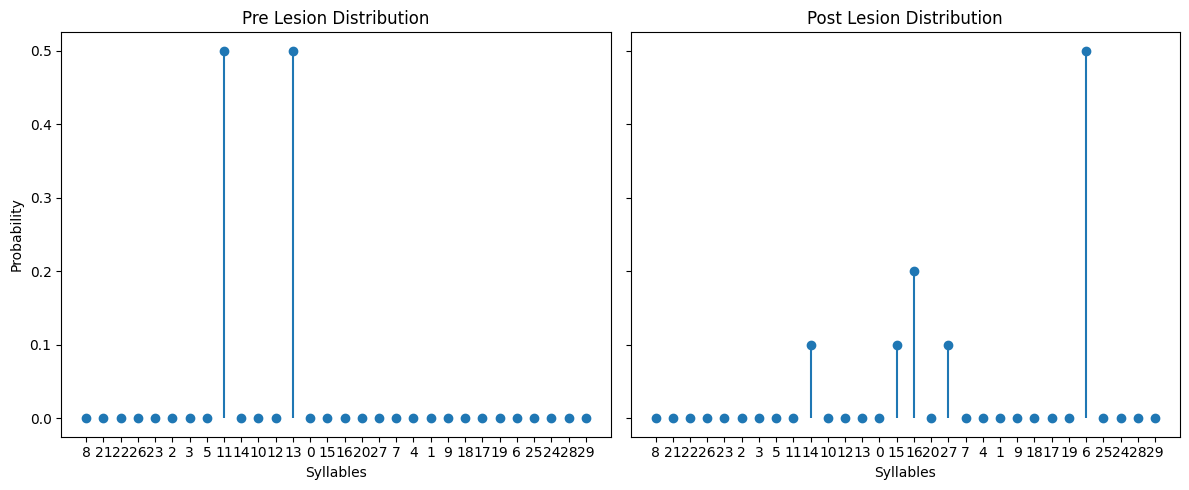

{"Earth Mover's Distance": np.float64(9.500011768173511),
 'Information Gain': np.float64(-0.6660769552914236),
 'Kullback-Leibler Divergence': np.float64(19.03607310404919)}
30 30


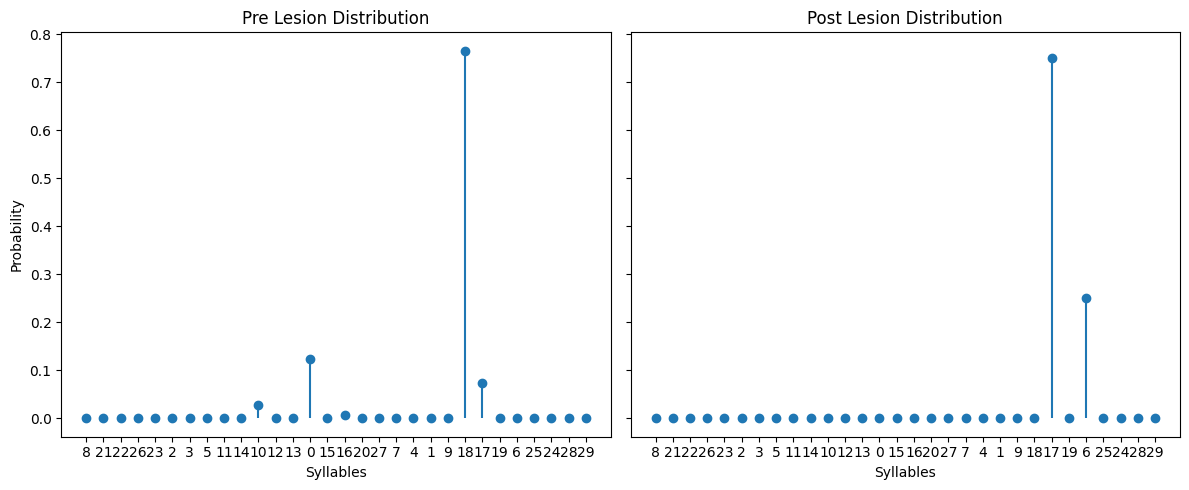

{"Earth Mover's Distance": np.float64(2.935820141627285),
 'Information Gain': np.float64(0.2379235822959359),
 'Kullback-Leibler Divergence': np.float64(16.630201315272544)}
30 30


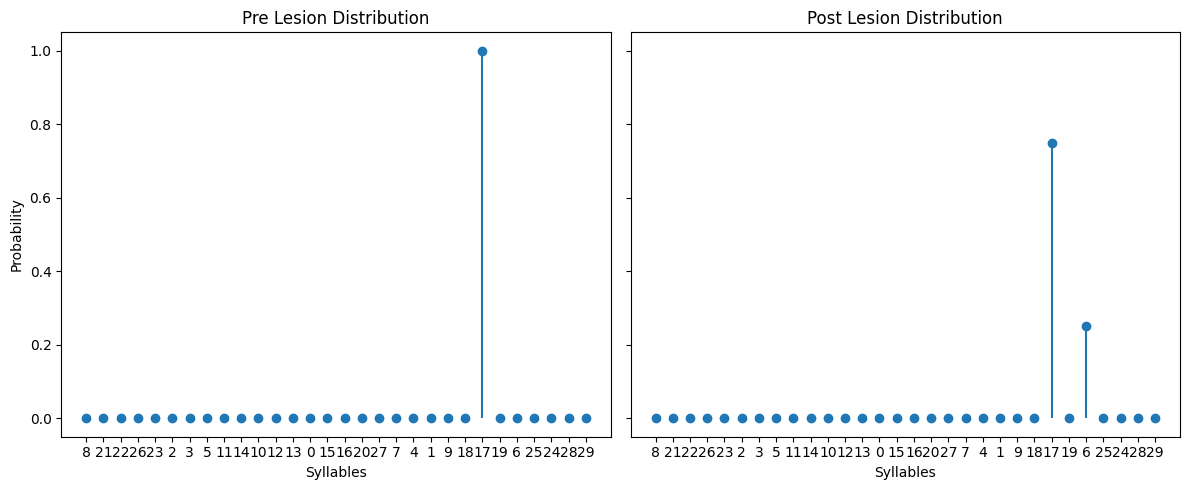

{"Earth Mover's Distance": np.float64(0.50002290810875),
 'Information Gain': np.float64(-0.5623100384737029),
 'Kullback-Leibler Divergence': np.float64(0.2876826345350053)}
30 30


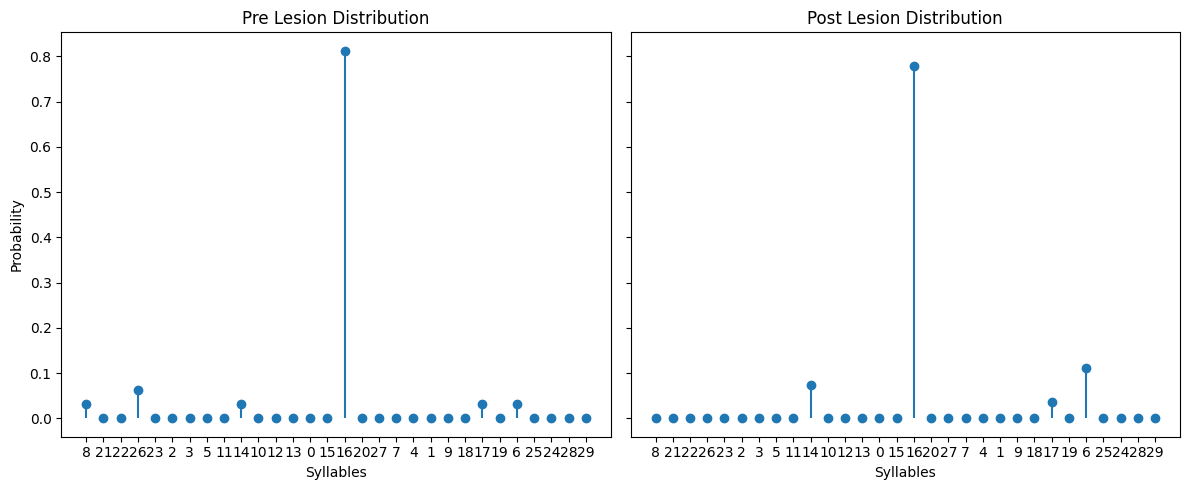

{"Earth Mover's Distance": np.float64(1.8067133116419187),
 'Information Gain': np.float64(0.020748391568976343),
 'Kullback-Leibler Divergence': np.float64(1.6247076940322298)}
30 30


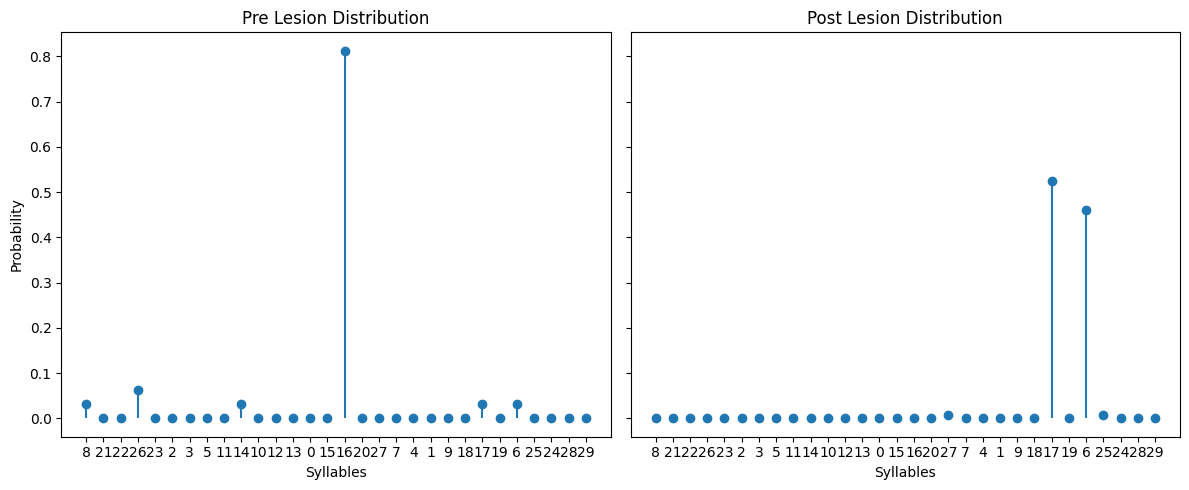

{"Earth Mover's Distance": np.float64(9.738912003034452),
 'Information Gain': np.float64(0.0016161986182937627),
 'Kullback-Leibler Divergence': np.float64(20.12576068427133)}
30 30


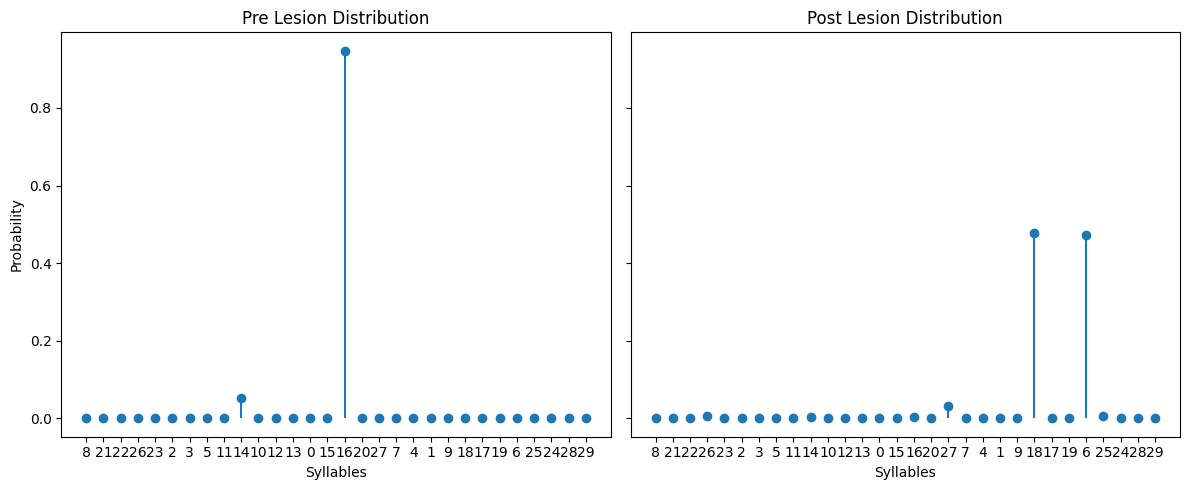

{"Earth Mover's Distance": np.float64(8.506828338240698),
 'Information Gain': np.float64(-0.7095245974205721),
 'Kullback-Leibler Divergence': np.float64(5.843540829923828)}
30 30


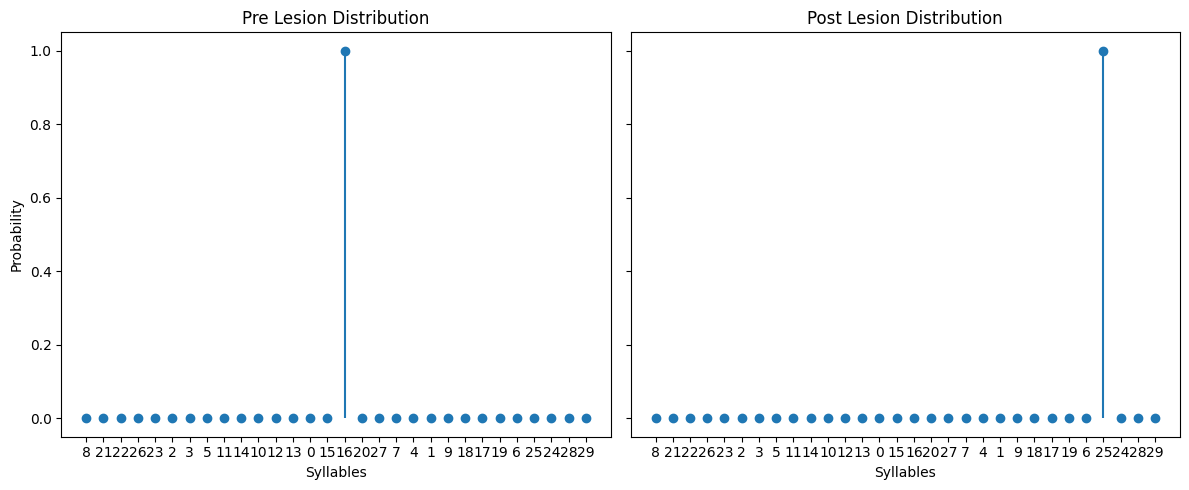

{"Earth Mover's Distance": np.float64(11.000023536346996),
 'Information Gain': np.float64(2.561095885060659e-05),
 'Kullback-Leibler Divergence': np.float64(19.036059752586503)}
30 30


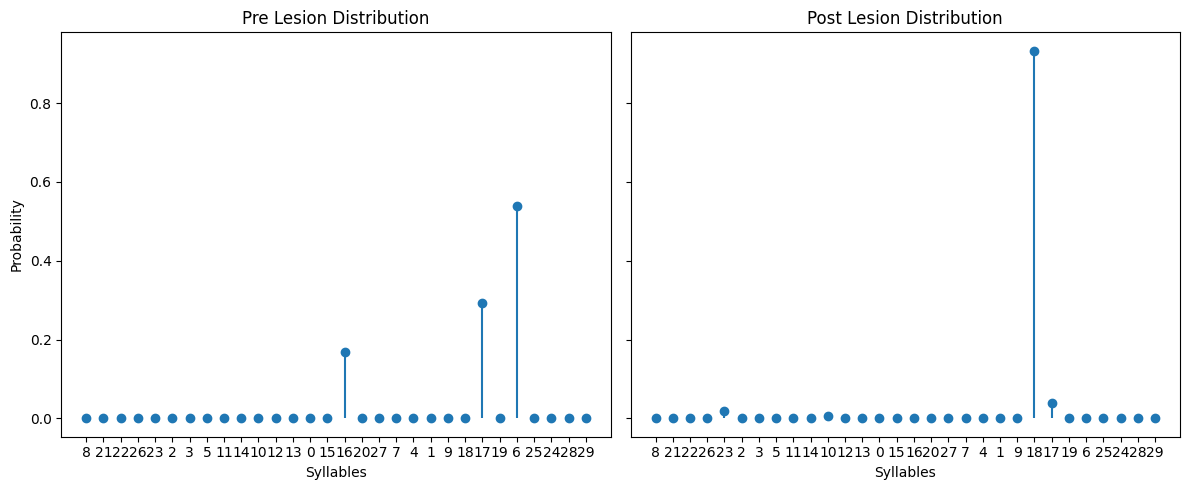

{"Earth Mover's Distance": np.float64(3.1038020277464007),
 'Information Gain': np.float64(0.674479796601007),
 'Kullback-Leibler Divergence': np.float64(16.82206620921797)}
30 30


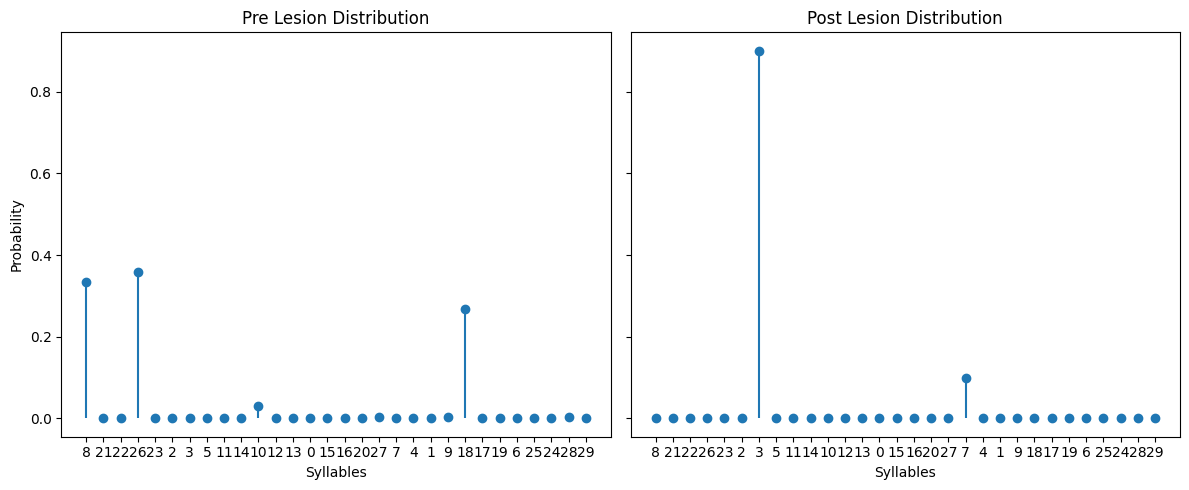

{"Earth Mover's Distance": np.float64(6.452686198881449),
 'Information Gain': np.float64(0.9279914251891281),
 'Kullback-Leibler Divergence': np.float64(21.70475344790862)}
30 30


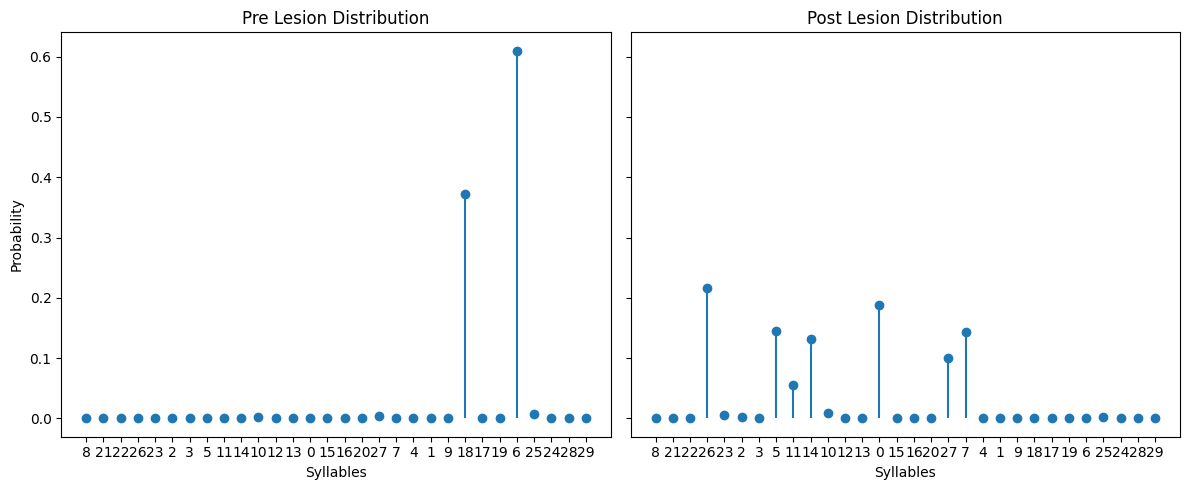

{"Earth Mover's Distance": np.float64(13.538370326036144),
 'Information Gain': np.float64(-1.1986677400092063),
 'Kullback-Leibler Divergence': np.float64(12.933817894646547)}
30 30


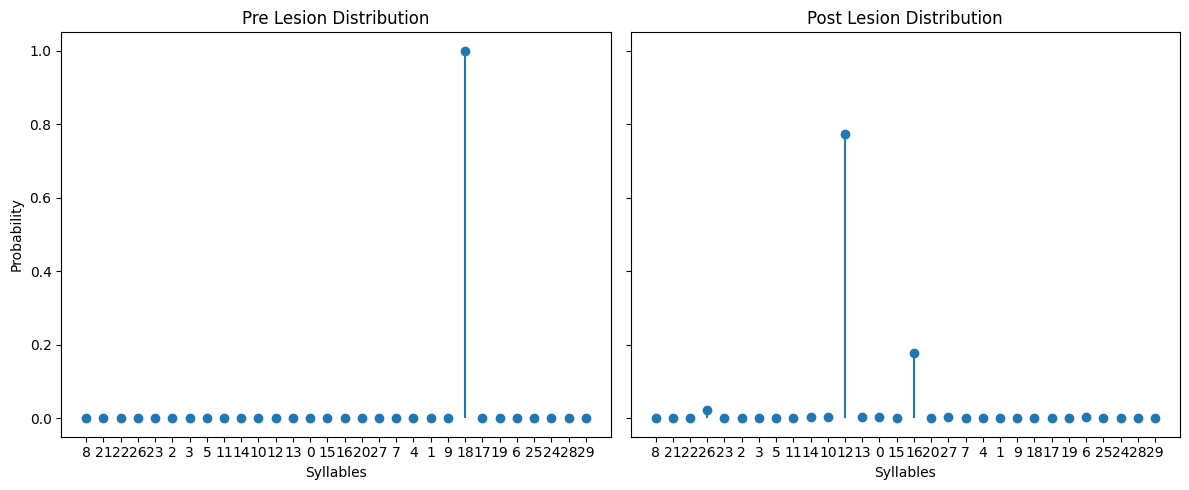

{"Earth Mover's Distance": np.float64(10.409089288072769),
 'Information Gain': np.float64(-0.738999640248228),
 'Kullback-Leibler Divergence': np.float64(22.820240925209117)}
30 30


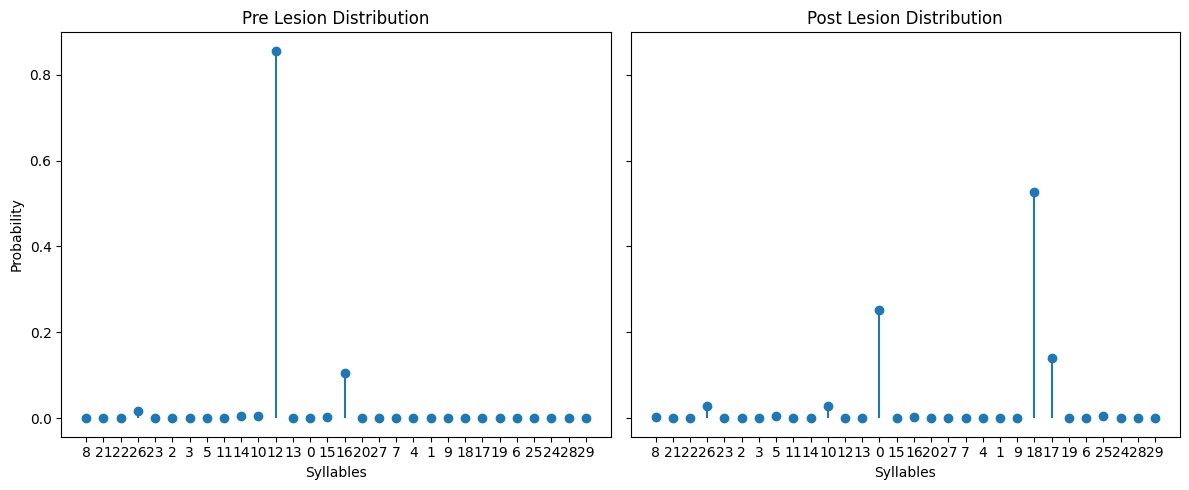

{"Earth Mover's Distance": np.float64(7.81504758757574),
 'Information Gain': np.float64(-0.732055505871243),
 'Kullback-Leibler Divergence': np.float64(6.436166950001441)}
30 30


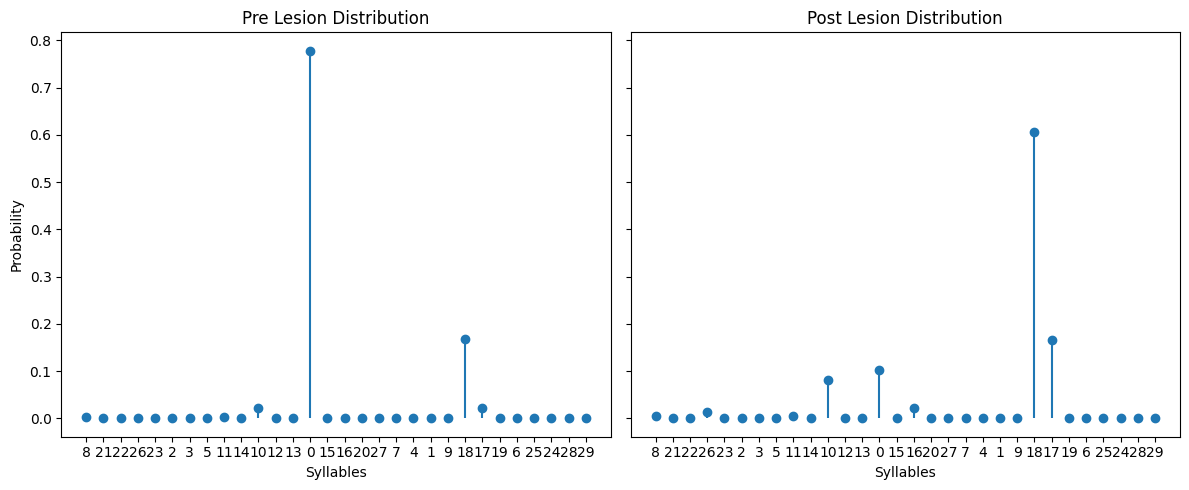

{"Earth Mover's Distance": np.float64(5.737721580894124),
 'Information Gain': np.float64(-0.5106940668424621),
 'Kullback-Leibler Divergence': np.float64(1.2819694989236294)}
30 30


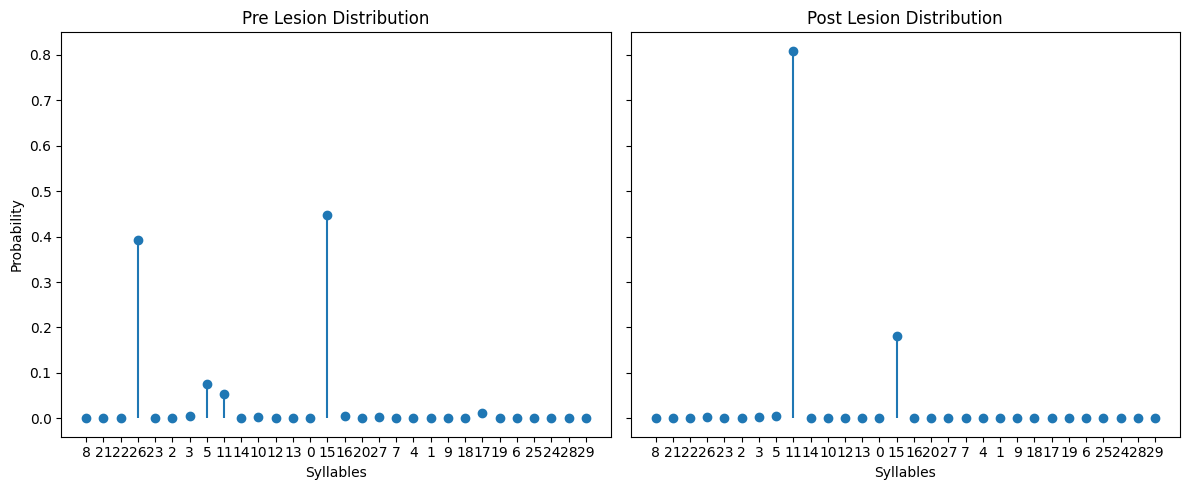

{"Earth Mover's Distance": np.float64(3.8825677724446344),
 'Information Gain': np.float64(0.6829647777025217),
 'Kullback-Leibler Divergence': np.float64(2.8480006211161886)}
30 30


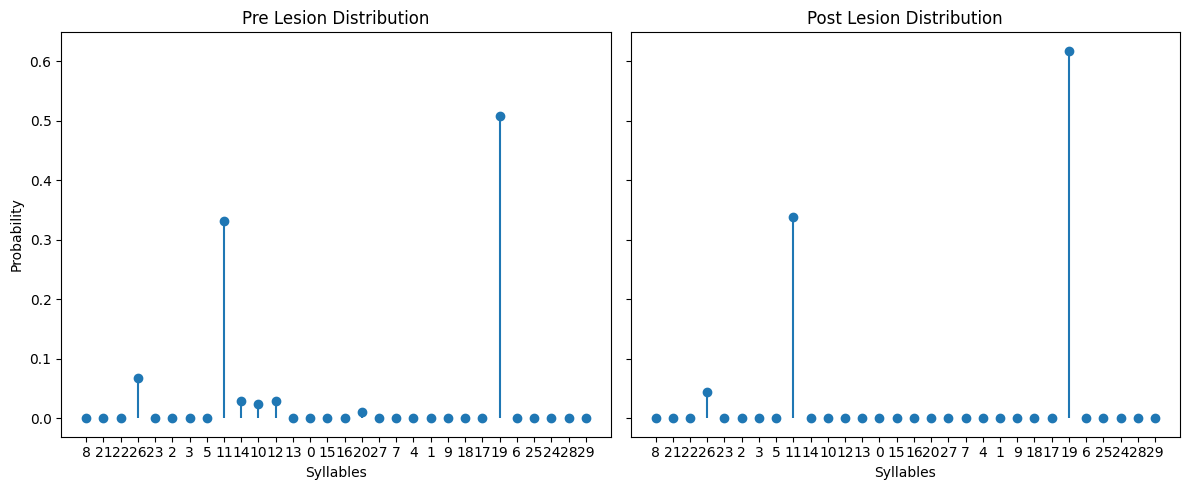

{"Earth Mover's Distance": np.float64(1.6048435792447622),
 'Information Gain': np.float64(0.43912001992600036),
 'Kullback-Leibler Divergence': np.float64(1.589051960515951)}
30 30


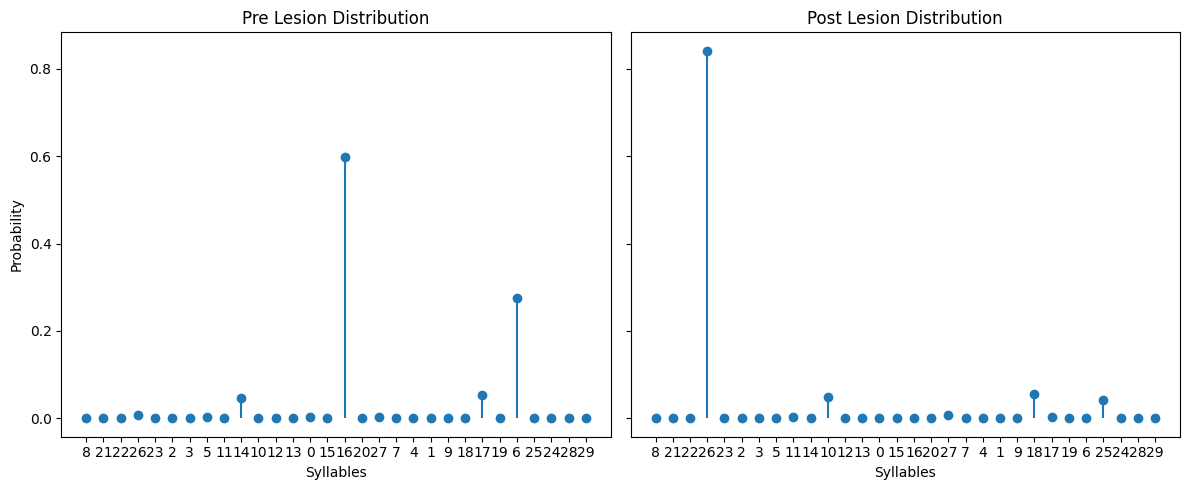

{"Earth Mover's Distance": np.float64(12.35172697444135),
 'Information Gain': np.float64(0.45059441032023473),
 'Kullback-Leibler Divergence': np.float64(21.08914461017809)}
30 30


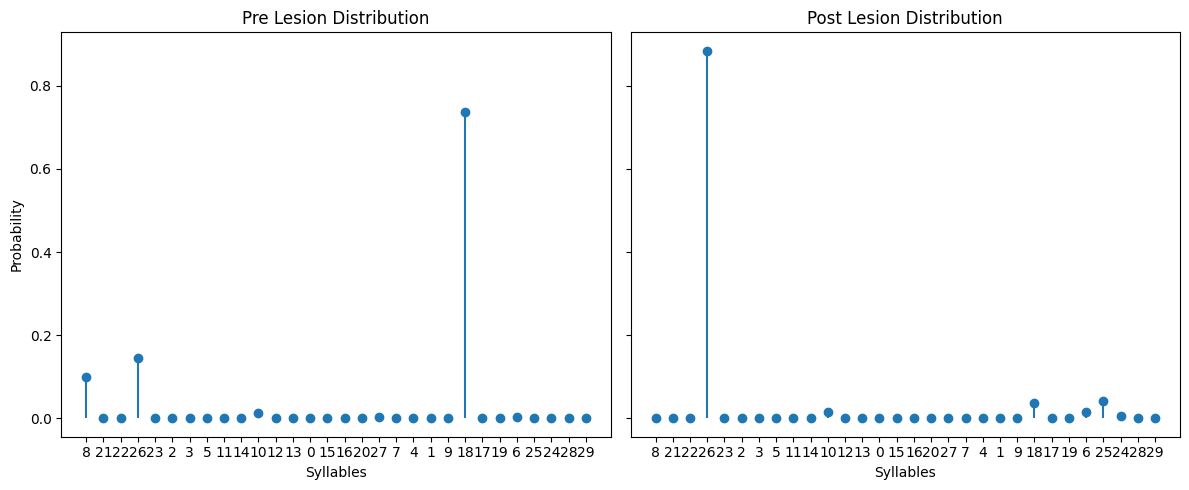

{"Earth Mover's Distance": np.float64(12.709793629402885),
 'Information Gain': np.float64(0.30046636786268),
 'Kullback-Leibler Divergence': np.float64(4.004511755729451)}
30 30


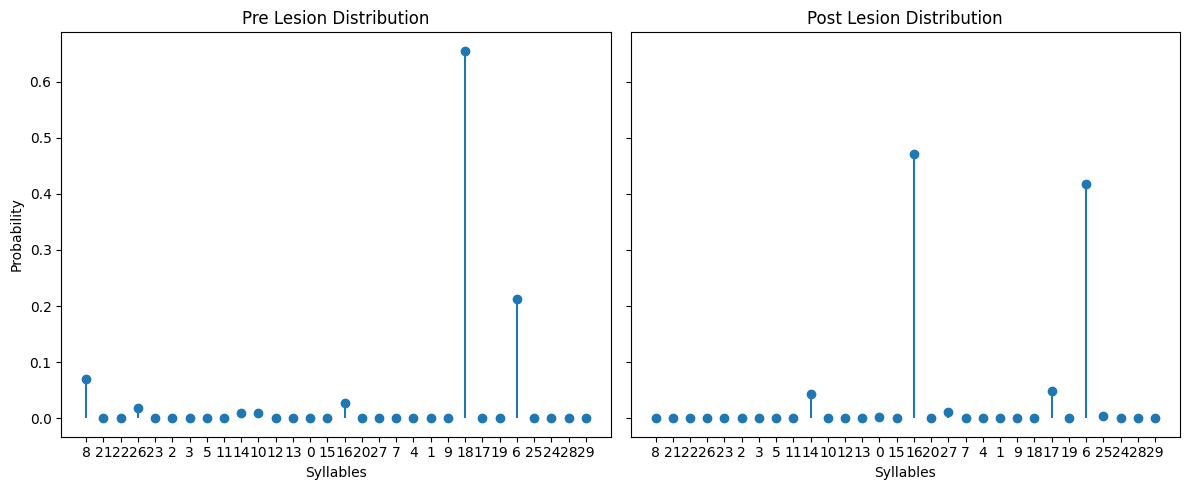

{"Earth Mover's Distance": np.float64(4.537662769072691),
 'Information Gain': np.float64(-0.055665188169391255),
 'Kullback-Leibler Divergence': np.float64(17.50744935011216)}
30 30


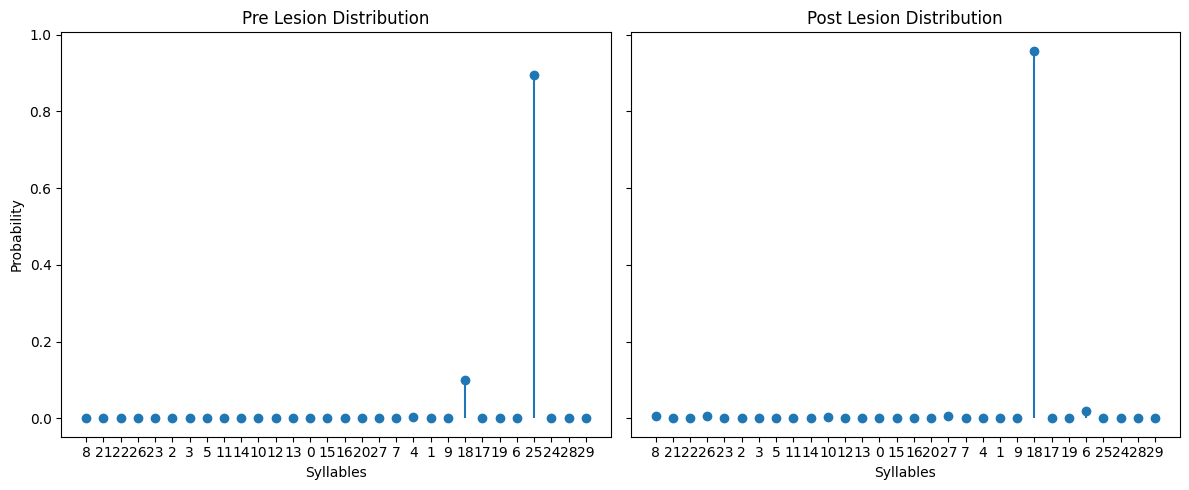

{"Earth Mover's Distance": np.float64(3.7516593570511843),
 'Information Gain': np.float64(0.13636952913638928),
 'Kullback-Leibler Divergence': np.float64(5.431018991421059)}
30 30


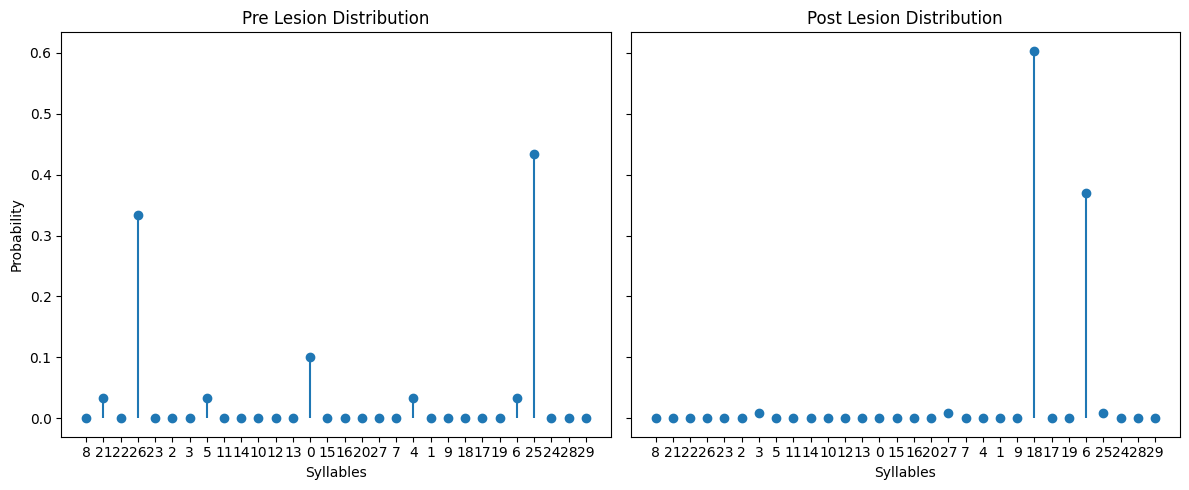

{"Earth Mover's Distance": np.float64(9.039080899422014),
 'Information Gain': np.float64(0.6167253724626043),
 'Kullback-Leibler Divergence': np.float64(12.510100671108548)}
30 30


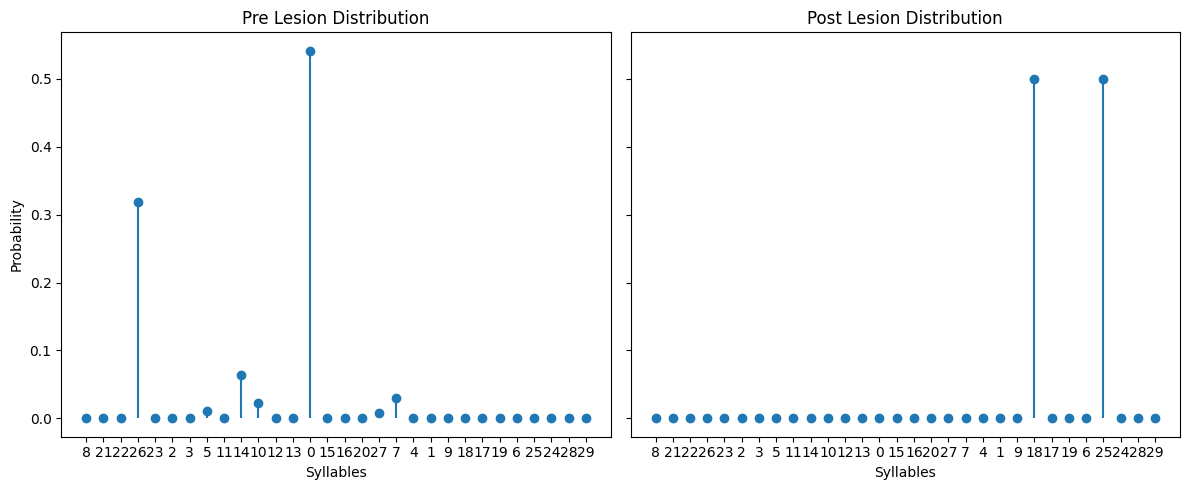

{"Earth Mover's Distance": np.float64(14.396327770670798),
 'Information Gain': np.float64(0.48639138686172856),
 'Kullback-Leibler Divergence': np.float64(17.624415878999308)}
30 30


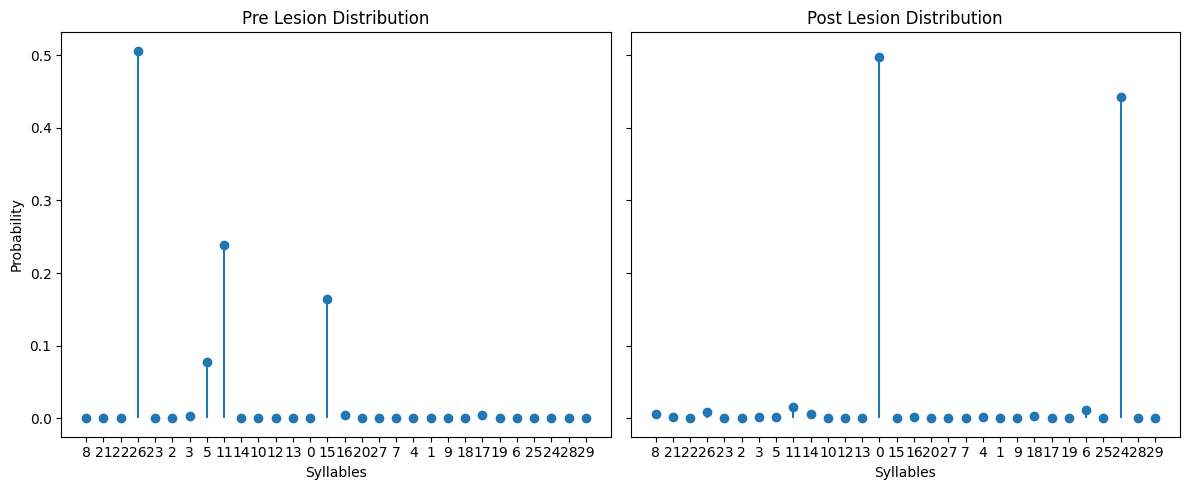

{"Earth Mover's Distance": np.float64(12.654887528548455),
 'Information Gain': np.float64(0.24874037961426176),
 'Kullback-Leibler Divergence': np.float64(6.66405479836859)}
30 30


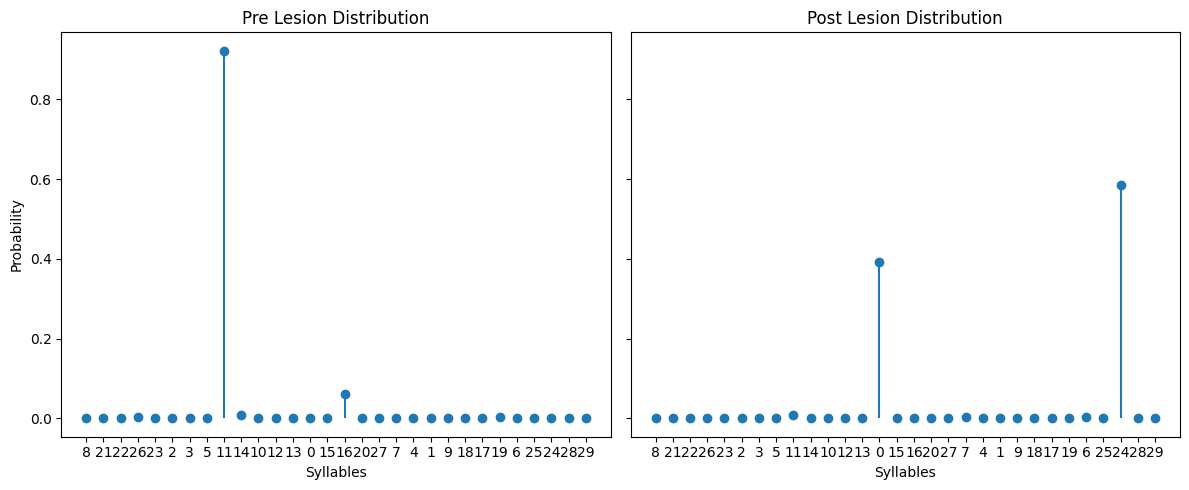

{"Earth Mover's Distance": np.float64(12.721686062448967),
 'Information Gain': np.float64(-0.46007861662030025),
 'Kullback-Leibler Divergence': np.float64(4.787472479689872)}
30 30


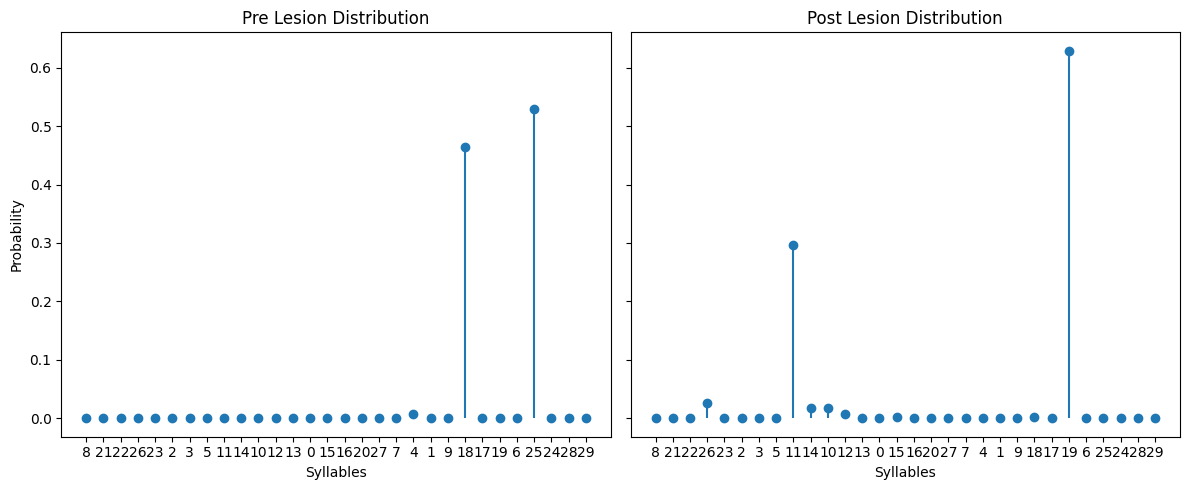

{"Earth Mover's Distance": np.float64(6.431670400350833),
 'Information Gain': np.float64(-0.23034656222807903),
 'Kullback-Leibler Divergence': np.float64(14.566308357970078)}


In [132]:
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

def calculate_metrics(pre_dist, post_dist):
    # Calculate KL Divergence
    kld = entropy(pre_dist, post_dist)

    # Calculate Earth Mover's Distance (EMD) using cumulative difference
    emd = np.sum(np.abs(np.cumsum(pre_dist) - np.cumsum(post_dist)))

    # Calculate Information Gain (IG)
    ig_pre = entropy(pre_dist)
    ig_post = entropy(post_dist)
    ig = ig_pre - ig_post

    return {
        'Kullback-Leibler Divergence': kld,
        'Earth Mover\'s Distance': emd,
        'Information Gain': ig
    }

def plot_before_and_after_distribution(syllables, pre_dist, post_dist):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    axes[0].stem(syllables, pre_dist, basefmt=" ")
    axes[0].set_title("Pre Lesion Distribution")
    axes[0].set_xlabel("Syllables")
    axes[0].set_ylabel("Probability")
    axes[1].stem(syllables, post_dist, basefmt=" ")
    axes[1].set_title("Post Lesion Distribution")
    axes[1].set_xlabel("Syllables")
    plt.tight_layout()
    plt.show()

import pprint

order = 3

assert np.array_equal(pre_surgery_pst.alphabet, post_surgery_pst.alphabet), "Alphabets must be the same"

for idx in range(len(pre_surgery_pst.tree[order]['p'])):
    print(len(pre_surgery_pst.tree[order]['p'][idx]), len(post_surgery_pst.tree[order]['p'][idx]))

    pre_probs = pre_surgery_pst.tree[order]['p'][idx]
    post_probs = post_surgery_pst.tree[order]['p'][idx]

    norm_pre_probs = (pre_probs + (1e-12)) / np.sum(pre_probs)
    norm_post_probs = (post_probs + (1e-12)) / np.sum(post_probs)

    plot_before_and_after_distribution(alphabet, norm_pre_probs, norm_post_probs)
    metrics = calculate_metrics(norm_pre_probs, norm_post_probs)

    pprint.pprint(metrics)
